# **3. Regression Modeling**

## *Table of Contents*

1. [Data Cleaning](./02_Data_Cleaning.ipynb)
2. [EDA and Feature Engineering](./03_Exploratory_Data_Analysis.ipynb)
3. [**Regression Modeling**](./04_Regression_Modeling.ipynb)
   1. [*Library Imports*](#Library-Imports)
   2. [*File Importation*](#File-Importation)
   3. [*Initializing Estimator*](#Initializing-Estimator)
   4. [*Feature Selection*](#Feature-Selection)
   5. [*Model Training with Optimal Features*](#Model-Training-with-Optimal-Features)
   6. [*Preprocessing for Model Training with Optimized Feature Subset from RFECV*](#Preprocessing-for-Model-Training-with-Optimized-Feature-Subset-from-RFECV)
   7. [*GridSearchCV for Random Forest*](#GridSearchCV-for-Random-Forest)
   8. [*Random Forest Model Fitting*](#Random-Forest-Model-Fitting)
   9. [*Model Diagnostics*](#Model-Diagnostics)
4. [Time_Series](./05_Time_Series.ipynb)

## **Library Imports**

### Standard library imports

In [1]:
import sys # Provides a way of using operating system dependent functionality
import os  # For interacting with the operating system

### Third-party imports

In [2]:
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For high-level data visualization
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV, mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

### Local application imports

In [3]:
# Define the absolute path of the parent directory of the script's grandparent directory
# This is useful for module importation from a different directory structure
parent_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, parent_dir)

# Local application imports
from utils import func_utils

## **File Importation**

In [4]:
# Determine the absolute path to the directory containing the current script
script_dir = os.path.dirname(os.getcwd())

# Construct the path to the data file
data_path = os.path.join(script_dir, '01_Data_Cleaning', '1_cleaned_melb_data.csv')

# Load dataset containing cleaned Melbourne housing data
melb_data = pd.read_csv(data_path)

## **Initializing Estimator**

In [5]:
# Initialize a RandomForestRegressor as the estimator.
estimator = RandomForestRegressor(n_jobs=-1, random_state=42)

## **Feature Selection**

### Mutual Information (MI)

### Recursive Feature Elimination (RFE)

#### Apply RFECV:

#### Review the Results:

Optimal number of features:  448
Best features:  Index(['Bedroom', 'Bathroom', 'Bathroom_was_0', 'Car', 'Car_was_missing',
       'Distance', 'Landsize', 'Landsize_Indicator', 'BuildingArea',
       'BuildingArea_was_missing',
       ...
       '3_Mont', '4_Mont', '5_Mont', '6_Mont', '7_Mont', '8_Mont', '9_Mont',
       '10_Mont', '11_Mont', '12_Mont'],
      dtype='object', length=448)

#### Plot the CV Score vs. Number of Features:

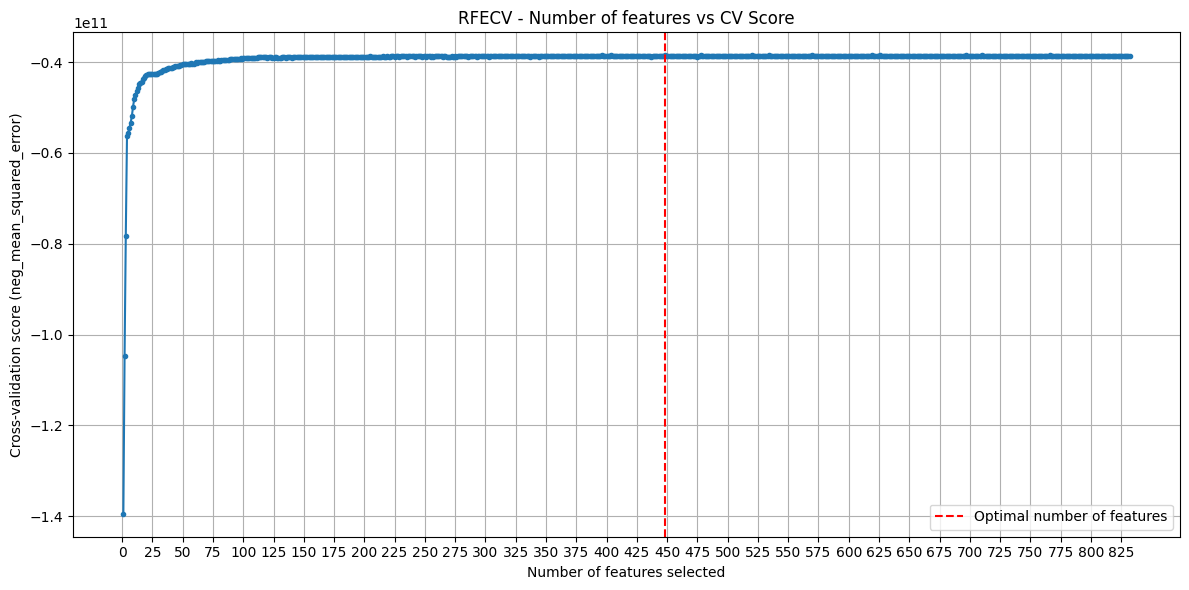

## **Model Training with Optimal Features**

### Preprocessing for Model Training: Leveraging Optimal Features

### GridSearchCV Optimization for RFECV-Selected Random Forest

### Random Forest Model Fitting with Optimal Features

### Model Diagnostics with Optimal Features

#### Cross Validation

### R² (R-squared)

### RMSE Calculation

### MSE & MAE Calculation

### Permutation Feature Importance

In [6]:
ind = ['Distance', 'Southern Metropolitan_Regi', 'BuildingArea', 'Landsize', 'Whitehorse_Coun', 'Bedroom', 'u_Type', 'Manningham_Coun', 'Monash_Coun', 't_Type', '2017_Year', 'S_Meth', 'Kingston_Coun', 'Bathroom', 'Northern Metropolitan_Regi', 'Bayside_Coun', 'Western Metropolitan_Regi', 'Car', '3206_Post', 'Boroondara_Coun', 'Moonee Valley_Coun', 'Hampton_Subu', 'Hume_Coun', '3058_Post', '3195_Post', 'McGrath_Sell', 'Brighton_Subu', 'Maribyrnong_Coun', '3081_Post', 'Greg_Sell', 'Moreland_Coun', 'Brimbank_Coun', '3186_Post', 'Marshall_Sell', 'Williamstown_Subu', 'Heidelberg West_Subu', 'Melton_Coun', 'Port Phillip_Coun', 'Jellis_Sell', 'Wyndham_Coun', 'Williams_Sell', 'Port Melbourne_Subu', 'hockingstuart_Sell', 'Maroondah_Coun', 'South-Eastern Metropolitan_Regi', '3054_Post', 'Aberfeldie_Subu', '3207_Post', '3040_Post', 'SP_Meth', 'Essendon West_Subu', '3_Mont', 'BuildingArea_was_missing', '3016_Post', '3084_Post', 'Stonnington_Coun', 'VB_Meth', 'Noel_Sell', 'Woodards_Sell', 'Sandringham_Subu', '11_Mont', 'Sunshine West_Subu', 'Niddrie_Subu', 'Ivanhoe East_Subu', 'Knox_Coun', 'Parkdale_Subu', '2_Mont', 'Eaglemont_Subu', 'Heidelberg_Subu', '12_Mont', 'Whittlesea_Coun', '3079_Post', 'Miles_Sell', '3104_Post', '3191_Post']

## **Preprocessing for Model Training with Optimized Feature Subset from RFECV**

In [7]:
# List of categorical features for dummy variable creation.
categorical_features = [
    'Postcode', 'Suburb', 'Regionname', 'CouncilArea', 'Type', 'SellerG',
    'Method', 'Year', 'Month'
]

# Creating dummy variables for categorical features and converting column names to strings.
melb_predict_data = func_utils.concat_dummies(melb_data, categorical_features)
melb_predict_data.columns = melb_predict_data.columns.astype(str)


# Define predictive features for model training.
predictive_features = ind
target = 'Price'

# Drop rows with missing target variable and prepare the feature matrix (X) and target vector (y).
melb_ba_drop = melb_predict_data.dropna(subset=[target])
X = melb_ba_drop[predictive_features]
y = melb_ba_drop[target]

# Split the dataset into training and test sets with a 20% test size and set a random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## **GridSearchCV for Random Forest**

In [8]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': list(range(50, 500, 50)),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': list(range(2, 20, 2))
}

# Execute grid search to find the best model parameters.
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score.
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best score (MSE):", -grid_search.best_score_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 350}
Best score (MSE): 39244969858.57615


## **Random Forest Model Fitting**

In [9]:
# Initialize the RandomForestRegressor with specified hyperparameters.
random_f_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
    random_state=42, n_jobs=-1
)

# Fit the model to the training data.
random_f_model.fit(X_train, y_train)

# Predict on training and test data.
y_train_pred = random_f_model.predict(X_train)
y_test_pred = random_f_model.predict(X_test)

## **Model Diagnostics**

### Cross Validation

In [11]:
# Perform 5-fold cross-validation to evaluate the model.
cv_scores = cross_val_score(random_f_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Convert scores to positive

# Print cross-validation scores, mean, and standard deviation.
print(f"CV MSE scores: {cv_scores}")
print(f"CV MSE mean: {cv_scores.mean()}")
print(f"CV MSE standard deviation: {cv_scores.std()}")

CV MSE scores: [5.09952974e+10 3.95036284e+10 4.76778794e+10 3.53303277e+10
 3.59572044e+10]
CV MSE mean: 41892867459.39436
CV MSE standard deviation: 6329740607.816754


### R² (R-squared)

In [17]:
# R² for training data
r2_train = r2_score(y_train, y_train_pred)

# R² for test data
r2_test = r2_score(y_test, y_test_pred)

print(f"R² for training data: {r2_train}")
print(f"R² for test data: {r2_test}")

R² for training data: 0.9544248725679739
R² for test data: 0.8095186654632931


### RMSE Calculation

In [12]:
# Calculate RMSE for both training and test datasets.
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Training RMSE: 96102.6188580567
Test RMSE: 192554.02687442955


### MSE & MAE Calculation

In [13]:
# Calculate MSE and MAE for both training and test datasets.
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"\nTraining MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

Training MSE: 9235713351.376915
Test MSE: 37077053265.55853

Training MAE: 67551.25015052485
Test MAE: 136200.81479500618


### Permutation Feature Importance

In [14]:
result = permutation_importance(random_f_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Assuming `X_test` includes both numerical and processed categorical variables after one-hot encoding
feature_names = X_test.columns

# Get importance scores from permutation importance
importances = result.importances_mean

# Create a Series for the permutation importances for easy manipulation and sorting
importances_series_perm = pd.Series(importances, index=feature_names).sort_values(ascending=False)

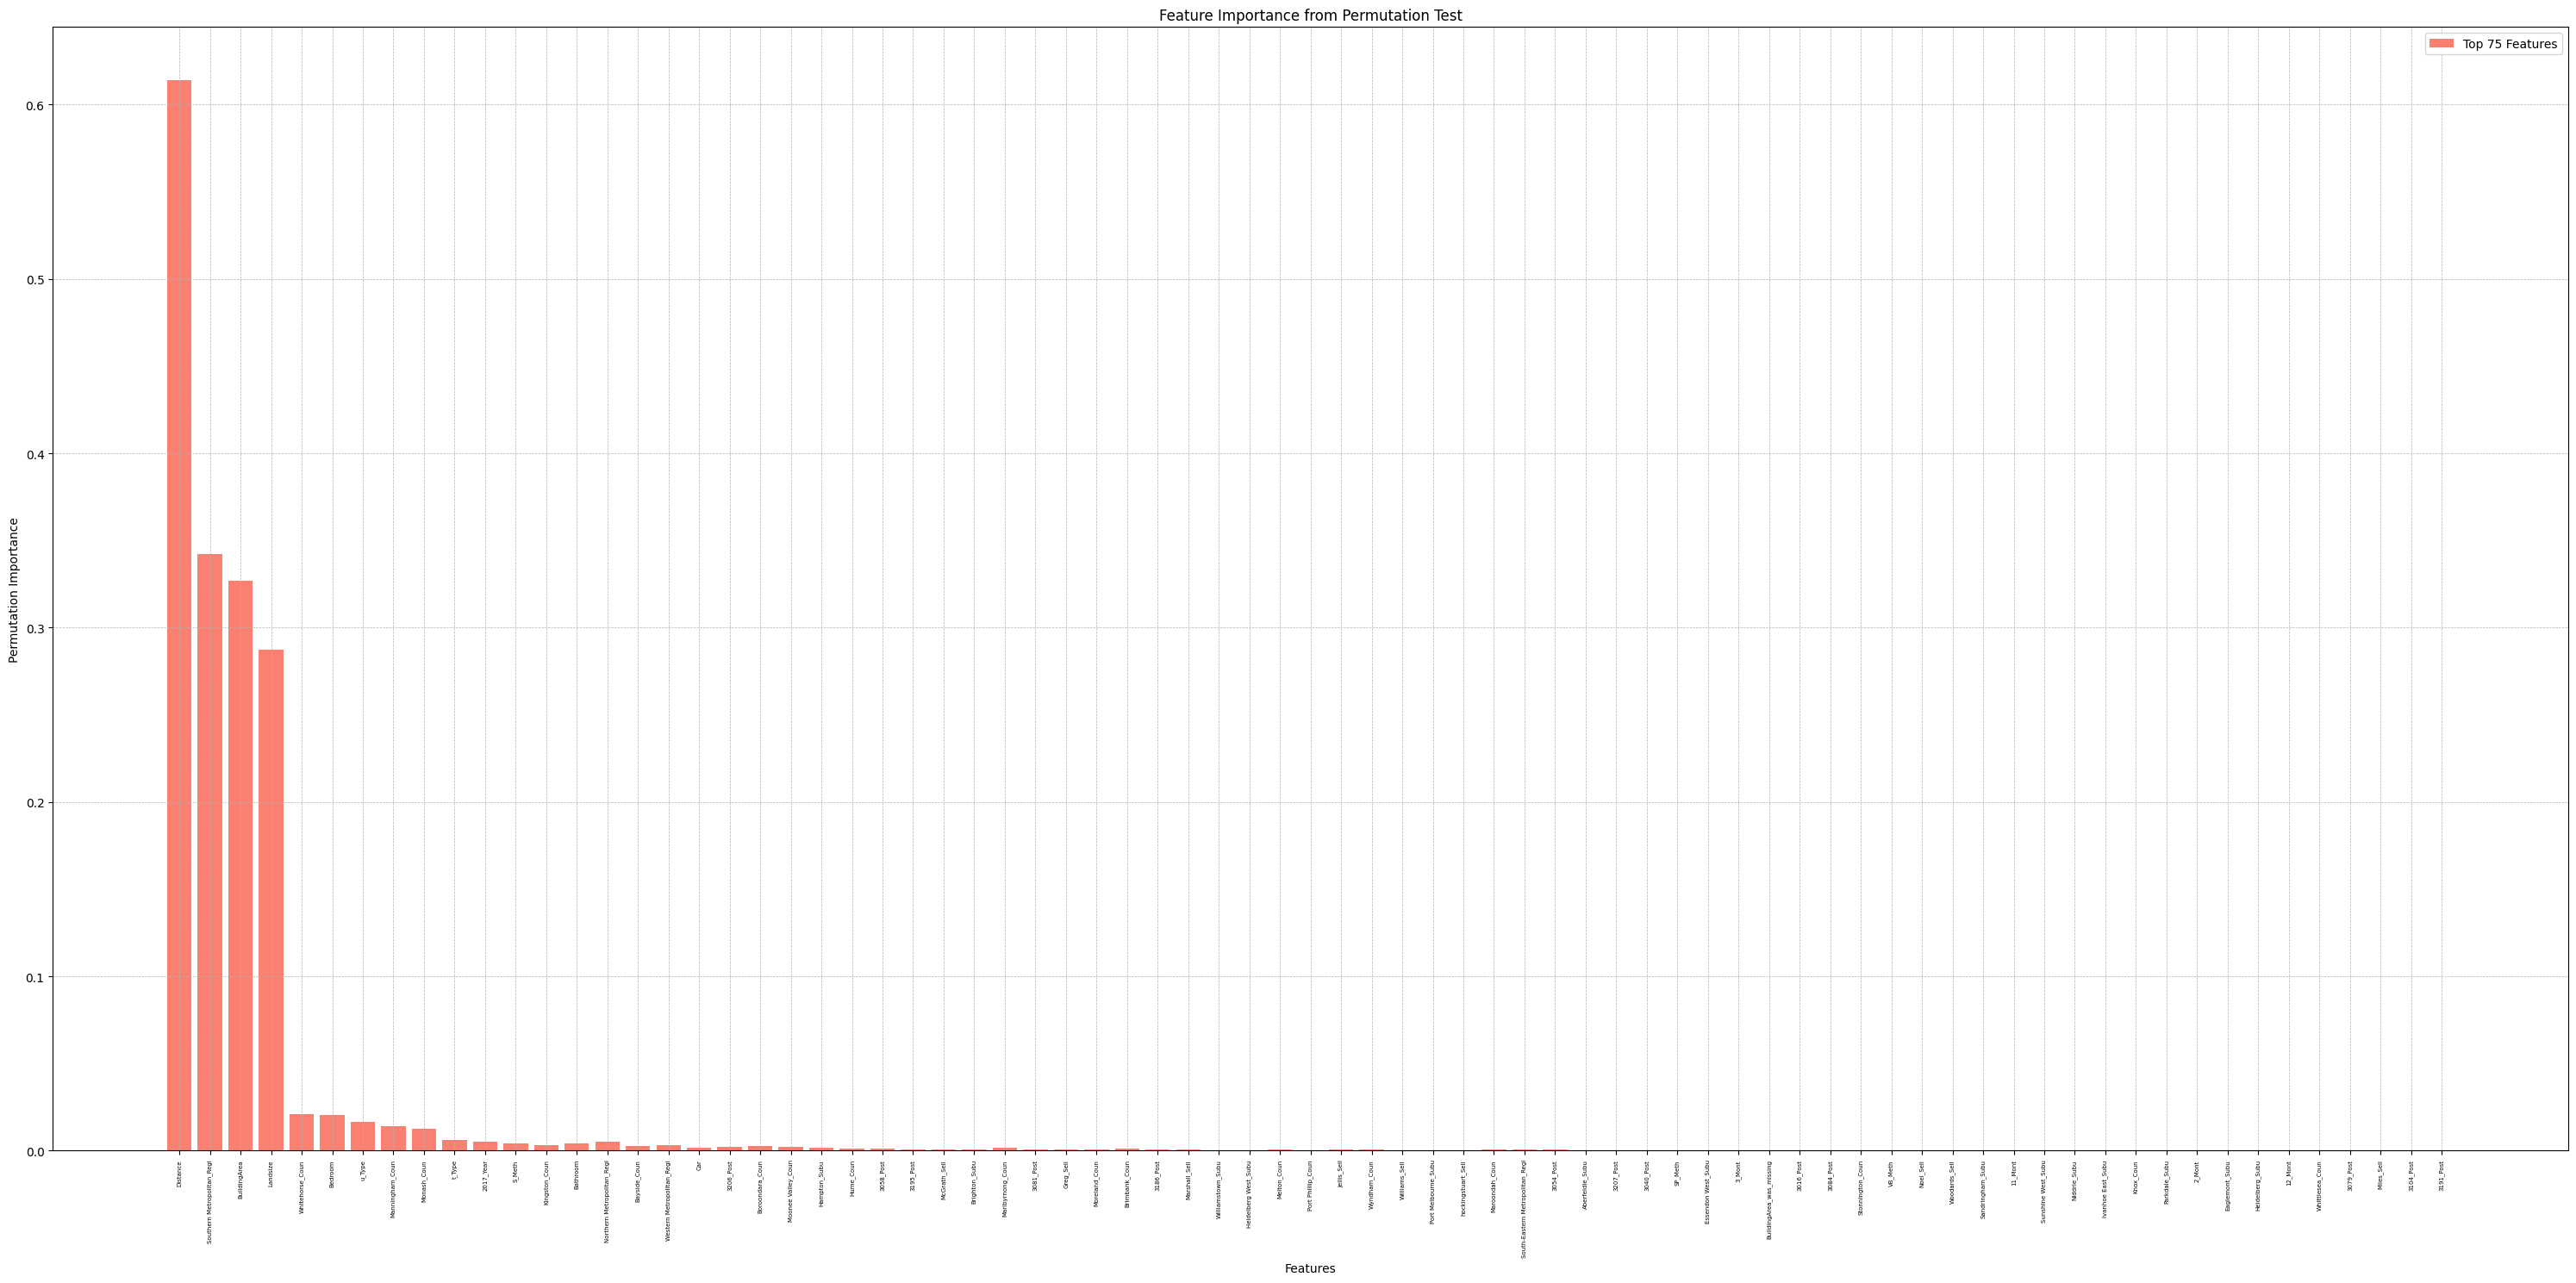

In [15]:
# Plot the permutation importances
plt.figure(figsize=(30, 15))  # Adjust the size as you like
plt.title('Feature Importance from Permutation Test')
plt.bar(feature_names, importances, color='skyblue')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.ylabel('Permutation Importance')
plt.xlabel('Features')

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Highlight the top N features with a different color
top_features = np.array(importances_series_perm.index)
mask = np.isin(feature_names, top_features)
plt.bar(feature_names[mask], importances[mask], color='salmon', label=f'Top {len(importances_series_perm)} Features')

# Adjust the font size
plt.xticks(fontsize=5)

# Ensure everything fits without overlapping
plt.tight_layout()

# Add legend
plt.legend()

# Show plot
plt.show()

### Feature Importance Analysis

In [16]:
# Assuming `X_train` includes both numerical and processed categorical variables.
feature_names = X_train.columns

# Extract feature importances from the model.
feature_importances = random_f_model.feature_importances_

# Create a Series for the feature importances for easy manipulation and sorting.
importances_series = pd.Series(
    feature_importances, index=feature_names
).sort_values(ascending=False)

print(importances_series)

BuildingArea                  0.284517
Distance                      0.183476
Southern Metropolitan_Regi    0.168290
Landsize                      0.146985
u_Type                        0.053618
                                ...   
Sunshine West_Subu            0.000237
3207_Post                     0.000215
Port Melbourne_Subu           0.000209
Niddrie_Subu                  0.000181
Essendon West_Subu            0.000129
Length: 75, dtype: float64
